In [1]:
import pandas as pd 
import numpy as np

In [2]:
df_original = pd.read_csv('GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'])

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB


In [4]:
df_original.convert_dtypes().dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  string
dtype: object

In [5]:
df = df_original.copy(deep=True)

In [6]:
df['year'] = pd.to_datetime(df['dt'])
df['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [7]:
dff = df['year'] > pd.to_datetime('1970-1-1')
df = df[dff]

df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [8]:
mean_t = df.groupby(['Country', pd.Grouper(key='year', freq='1Y')]).agg({'AverageTemperature':[np.median]})
mean_t

AverageTemperature
                                   median
Country     year                         
Afghanistan 1970-12-31            16.1990
            1971-12-31            14.9340
            1972-12-31            13.8725
            1973-12-31            14.9130
            1974-12-31            13.6160
...                                   ...
Åland       2009-12-31             5.5765
            2010-12-31             4.7550
            2011-12-31             7.4990
            2012-12-31             6.2540
            2013-12-31             6.0140

[10692 rows x 1 columns]

In [9]:
mean_te = mean_t['AverageTemperature'][['median']].reset_index()

In [10]:
mean_te['date'] = mean_te['year'].dt.year
mean_te['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [11]:
#df.drop(['dt'],axis=1, inplace=True)

In [12]:
mean_te.rename(columns={'median':'temperature'}, inplace=True)
mean_te

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [13]:
df_agri = pd.read_csv('agricultura.csv', header=2)
df_fore = pd.read_csv('forest.csv', header=2)
df_elec = pd.read_csv('electricity.csv', header=2)
df_co2 = pd.read_csv('co2.csv', header=2)
df_pop = pd.read_csv('pop.csv', header=2)

In [14]:
fechas = pd.date_range(start='1970', end='2016', freq='Y')
fechas = ['Country Name','Country Code'] + list(fechas.map(lambda x: str(x.year)))
fechas[:5]

['Country Name', 'Country Code', '1970', '1971', '1972']

In [15]:
def fun_format(df, col='population'):
    return df.loc[:, fechas].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'Country Name':'Country',
    'Country Code':'name',
    'variable':'date',
    'value':col})

In [16]:
df_agri = fun_format(df_agri, col='agricultura')
df_fore = fun_format(df_fore, col='forest')
df_elec = fun_format(df_elec, col='electricity')
df_co2 = fun_format(df_co2, col='co2')
df_pop = fun_format(df_pop, col='population')
df_fore

,Country,name,date,forest
0,Aruba,ABW,1970,NaN
1,Afghanistan,AFG,1970,NaN
2,Angola,AGO,1970,NaN
3,Albania,ALB,1970,NaN
4,Andorra,AND,1970,NaN
...,...,...,...,...
12139,Kosovo,XKX,2015,NaN
12140,"Yemen, Rep.",YEM,2015,5490.0
12141,South Africa,ZAF,2015,172320.9
12142,Zambia,ZMB,2015,457551.0


In [17]:
mean_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      10692 non-null  object        
 1   year         10692 non-null  datetime64[ns]
 2   temperature  10648 non-null  float64       
 3   date         10692 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 334.2+ KB


In [18]:
df_agri['date'] = df_agri['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2['date'] = df_co2['date'].astype(float)
df_pop['date'] = df_pop['date'].astype(float)

In [19]:
df_merge = pd.merge(mean_te[['Country','temperature','date']],df_fore, on=['Country', 'date'],how='inner')

In [20]:
def fun_merge(df1,df2):
    return pd.merge(df1,df2,on=['Country','date'], how = 'inner')

In [21]:
df_merge = fun_merge(df_merge,df_co2)
df_merge = fun_merge(df_merge,df_elec)
df_merge = fun_merge(df_merge,df_agri)
df_merge = fun_merge(df_merge,df_fore)
df_merge

,Country,temperature,date,name_x,forest_x,name_y,co2,name_x,electricity,name_y,agricultura,name,forest_y
0,Afghanistan,16.1990,1970,AFG,NaN,AFG,1672.152,AFG,NaN,AFG,380060.0,AFG,NaN
1,Afghanistan,14.9340,1971,AFG,NaN,AFG,1895.839,AFG,NaN,AFG,380360.0,AFG,NaN
2,Afghanistan,13.8725,1972,AFG,NaN,AFG,1532.806,AFG,NaN,AFG,380460.0,AFG,NaN
3,Afghanistan,14.9130,1973,AFG,NaN,AFG,1639.149,AFG,NaN,AFG,380480.0,AFG,NaN
4,Afghanistan,13.6160,1974,AFG,NaN,AFG,1917.841,AFG,NaN,AFG,380480.0,AFG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,Zimbabwe,22.4860,2009,ZWE,179513.5,ZWE,5603.176,ZWE,585.456912,ZWE,163000.0,ZWE,179513.5
7388,Zimbabwe,23.3040,2010,ZWE,179052.8,ZWE,7803.376,ZWE,606.644199,ZWE,162000.0,ZWE,179052.8
7389,Zimbabwe,22.9420,2011,ZWE,178592.1,ZWE,9622.208,ZWE,636.249337,ZWE,164000.0,ZWE,178592.1
7390,Zimbabwe,23.0455,2012,ZWE,178131.4,ZWE,7873.049,ZWE,608.762505,ZWE,162000.0,ZWE,178131.4


In [22]:
df_merge.drop(['name_x', 'forest_x', 'name_y'],axis=1, inplace=True)

In [23]:
df_merge

,Country,temperature,date,co2,electricity,agricultura,name,forest_y
0,Afghanistan,16.1990,1970,1672.152,NaN,380060.0,AFG,NaN
1,Afghanistan,14.9340,1971,1895.839,NaN,380360.0,AFG,NaN
2,Afghanistan,13.8725,1972,1532.806,NaN,380460.0,AFG,NaN
3,Afghanistan,14.9130,1973,1639.149,NaN,380480.0,AFG,NaN
4,Afghanistan,13.6160,1974,1917.841,NaN,380480.0,AFG,NaN
...,...,...,...,...,...,...,...,...
7387,Zimbabwe,22.4860,2009,5603.176,585.456912,163000.0,ZWE,179513.5
7388,Zimbabwe,23.3040,2010,7803.376,606.644199,162000.0,ZWE,179052.8
7389,Zimbabwe,22.9420,2011,9622.208,636.249337,164000.0,ZWE,178592.1
7390,Zimbabwe,23.0455,2012,7873.049,608.762505,162000.0,ZWE,178131.4


In [33]:
df_temp_g = df_merge.dropna()

In [32]:
df_d = df_merge.groupby('date').median()

,Country,temperature,date,co2,electricity,agricultura,name,forest_y
0,Afghanistan,16.1990,1970,1672.152,NaN,380060.0,AFG,NaN
1,Afghanistan,14.9340,1971,1895.839,NaN,380360.0,AFG,NaN
2,Afghanistan,13.8725,1972,1532.806,NaN,380460.0,AFG,NaN
3,Afghanistan,14.9130,1973,1639.149,NaN,380480.0,AFG,NaN
4,Afghanistan,13.6160,1974,1917.841,NaN,380480.0,AFG,NaN
...,...,...,...,...,...,...,...,...
7387,Zimbabwe,22.4860,2009,5603.176,585.456912,163000.0,ZWE,179513.5
7388,Zimbabwe,23.3040,2010,7803.376,606.644199,162000.0,ZWE,179052.8
7389,Zimbabwe,22.9420,2011,9622.208,636.249337,164000.0,ZWE,178592.1
7390,Zimbabwe,23.0455,2012,7873.049,608.762505,162000.0,ZWE,178131.4


In [34]:
df_temp_g

,Country,temperature,date,co2,electricity,agricultura,name,forest_y
64,Albania,13.4490,1990,5515.168,552.252185,11210.0,ALB,7888.0
65,Albania,11.5885,1991,4286.723,418.453589,11270.0,ALB,7868.5
66,Albania,13.5850,1992,2515.562,453.644074,11270.0,ALB,7849.0
67,Albania,13.6500,1993,2335.879,536.363825,11260.0,ALB,7829.5
68,Albania,13.2390,1994,1925.175,596.407959,11260.0,ALB,7810.0
...,...,...,...,...,...,...,...,...
7387,Zimbabwe,22.4860,2009,5603.176,585.456912,163000.0,ZWE,179513.5
7388,Zimbabwe,23.3040,2010,7803.376,606.644199,162000.0,ZWE,179052.8
7389,Zimbabwe,22.9420,2011,9622.208,636.249337,164000.0,ZWE,178592.1
7390,Zimbabwe,23.0455,2012,7873.049,608.762505,162000.0,ZWE,178131.4


In [26]:
import seaborn as sns

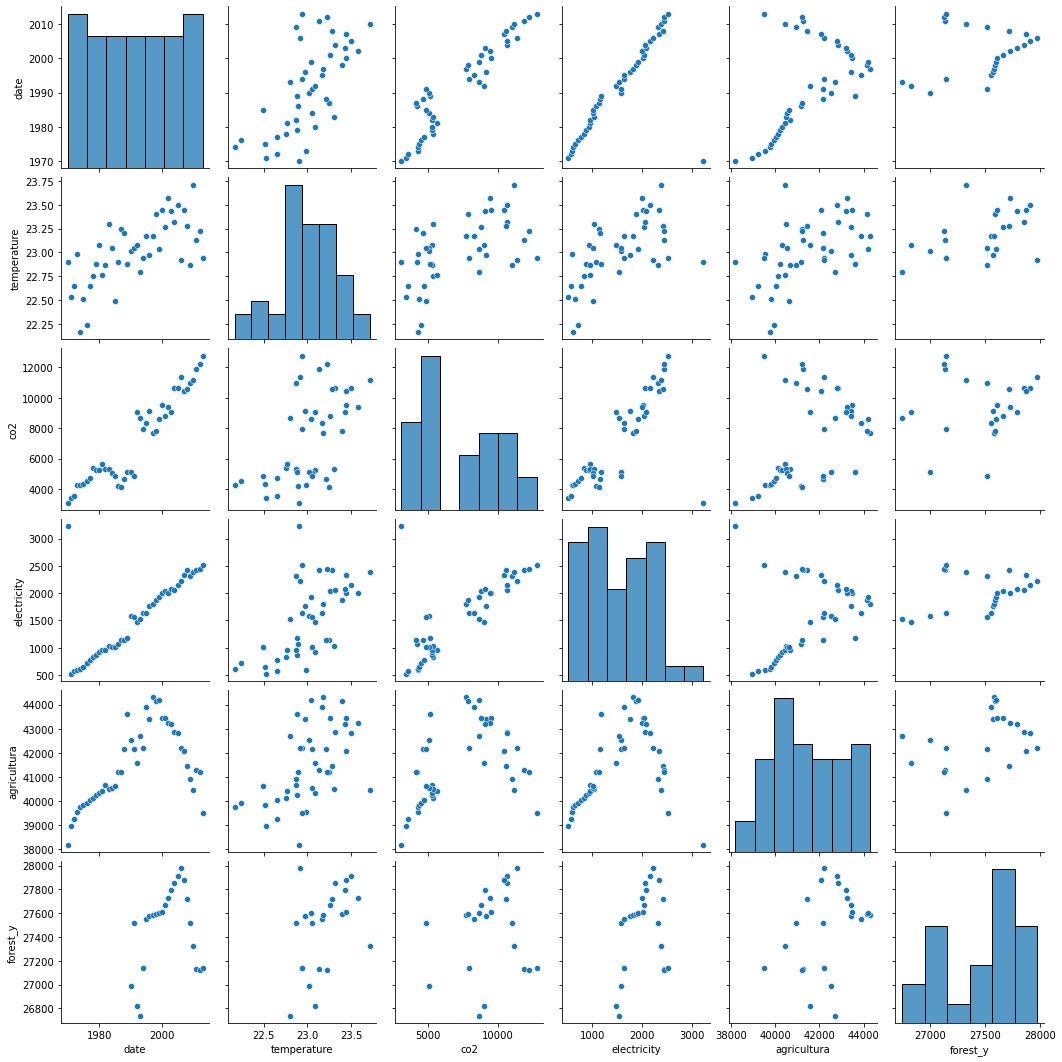

In [27]:
sns.pairplot(df_d.reset_index())

In [36]:
df_temp_g.to_excel(r'C:\Users\steve\Documents\global_temperature_.xlsx')